<a href="https://colab.research.google.com/github/galaxyenergy/myInfra2021Repo/blob/master/TWEETER_US_AIRLINE_SENTIMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TWITTER US AIRLINE SENTIMENT PROJECT 


OLA LAWAL MARCH 2022


Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

Dataset:

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone
 

Objective:

To implement the techniques learned as a part of the course.


Learning Outcomes:

* Basic understanding of text pre-processing.
* What to do after text pre-processing
* Bag of words
* Tf-idf
* Build the classification model.
* Evaluate the Model

DATA SUMMARY

IMPORT LIBRARIES

In [ ]:
!pip install spacy
!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package
!pip install contractions
!pip install wordcloud

import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words

from bs4 import BeautifulSoup  
import unicodedata                                   # Natural language processing tool-kit
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
import re
import spacy
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize            
from nltk.stem import PorterStemmer                 # Stemmer
import string  
import contractions


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install spacy
!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package
!pip install contractions
!pip install wordcloud

                       

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score  


import nltk
nltk.download('wordnet')

import warnings       
warnings.filterwarnings("ignore")  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LOAD DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ts.csvweet')

In [ ]:
df=data.copy()

PRINT SHAPE OF DATA

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


- There are 14,640 rows and 15 columns in the data set

In [ ]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- There are 11 objects, 2 integer and 2 floats

In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- There are missing data in 7 of the 15 dataset

EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df.columns                                           # Print the column of the dataframe

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

PLOT OF DISTRIBUTION OF ALL TWEETS AMONG EACH AIRLINE AND DISTRIBUTION OF SENTIMENT OF TWEETS ACROSS ALL THE TWEETS

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


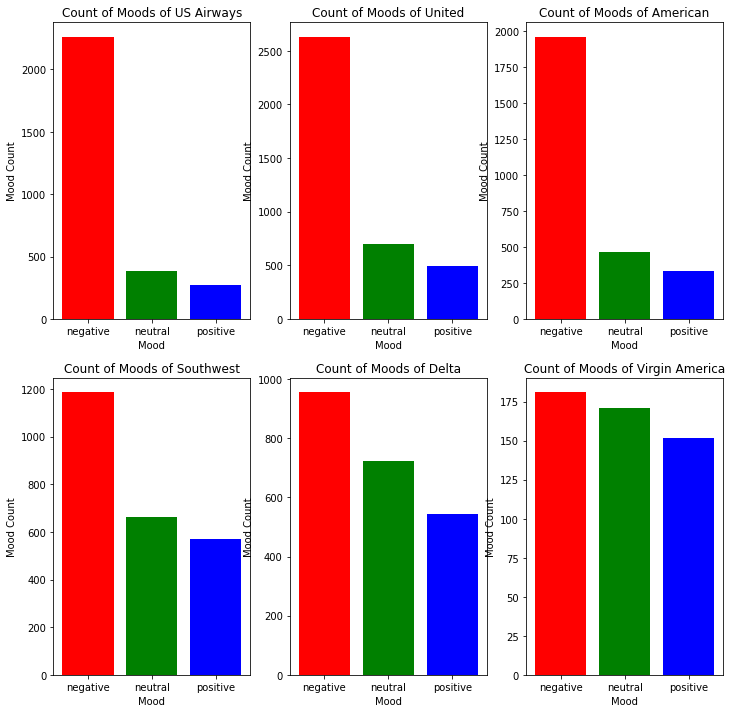

In [ ]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

- United, US Airways and American have the highest number of negative sentiment.
- Virgin America has the highest positive sentiment  

PLOT OF DISTRIBUTOIN OF ALL THE NEGATIVE REASONS

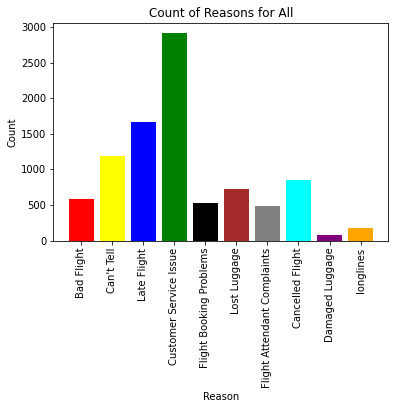

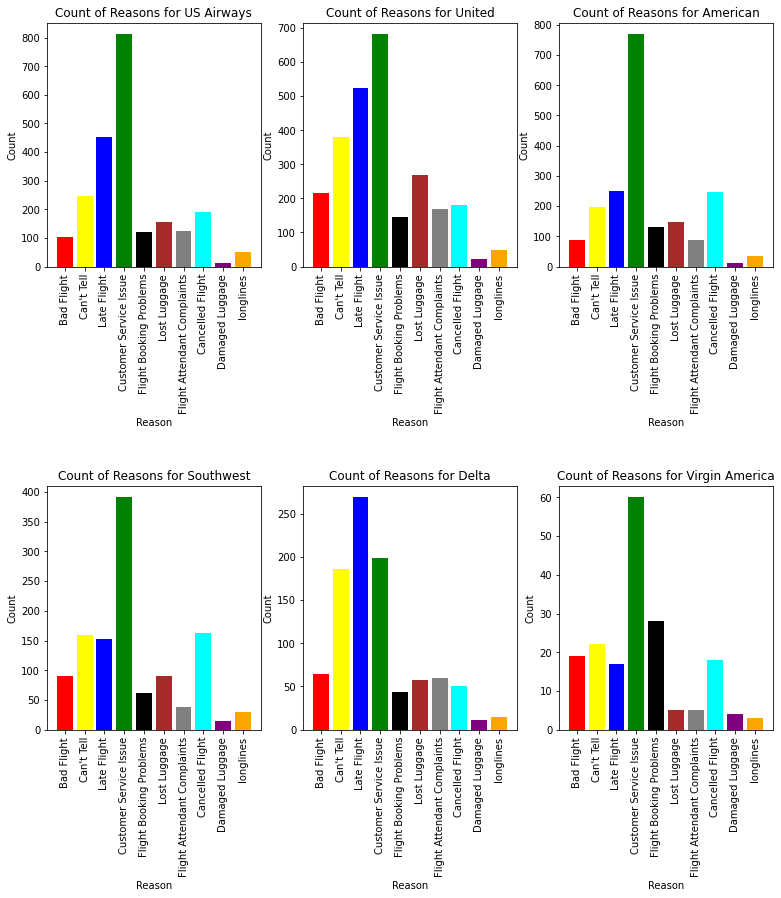

In [ ]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(airline):
    if airline=='All':
        a=df
    else:
        a=df[df['airline']==airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(airline):
    
    a=NR_Count(airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

- Customer service tops the most airlines customers negative sentiments and concerns. Almost all of them.
- Late airline flights came seconds for three of the arilines (United, Delta and US Airways)
- Long lines and baggage damages are the lowest customers concerns

WORD CLOUD GRAPH OF POSITIVE AND NEGATIVE SENTIMENT

Word Cloud for Positive Reviews

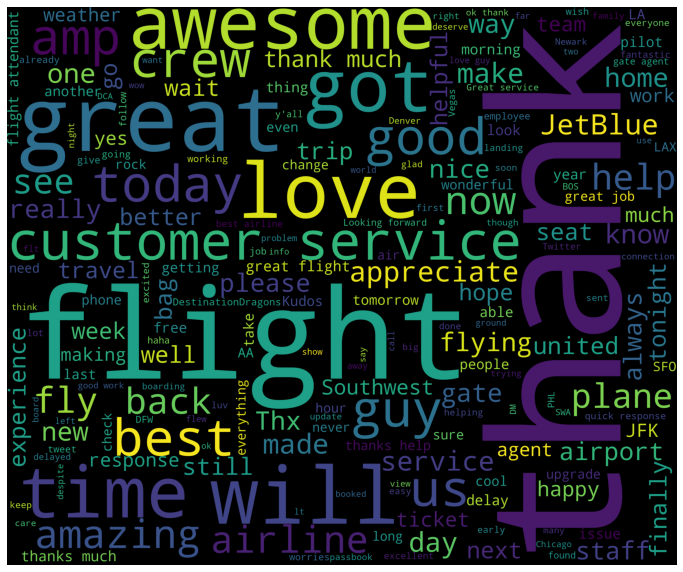

In [ ]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Negative Reviews

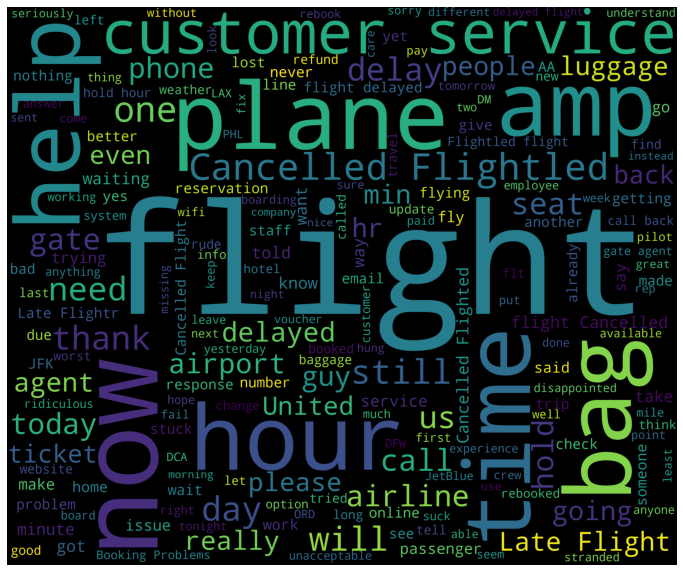

In [ ]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
#get the no of words in every text

df['word_count'] = [len(t.split()) for t in df.text]

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,word_count
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),4
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),9
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),12
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),17
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),10


In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
#creating word cloud for negative reviews
negative_reviews=df[df['text']==0]
words = ' '.join(negative_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(df['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud to eliminate stop words
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

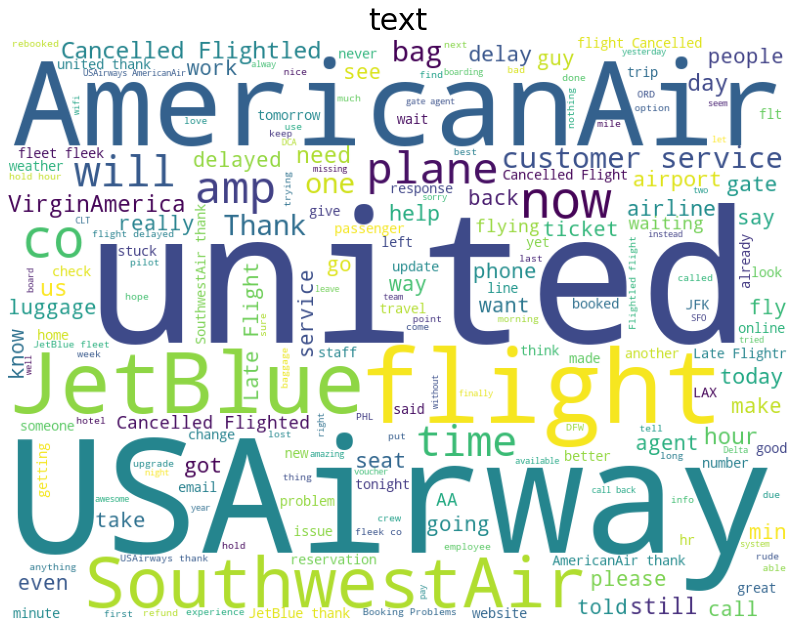

In [ ]:
show_wordcloud(df,'text')

Word Cloud for Positive Reviews

In [ ]:
#creating word cloud for positive reviews
positive_reviews=df[df['text']==1]
words = ' '.join(positive_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
df['airline_sentiment'].unique()         #check the labels

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
df['airline_sentiment'].value_counts() 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

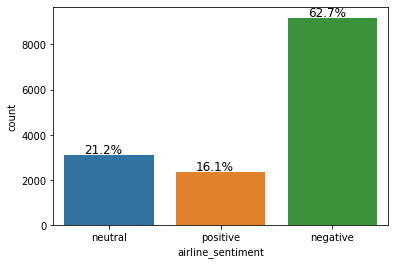

In [ ]:
#plot the distribution of the class label
def bar_plot(df, feature):
    plot = sns.countplot(x =feature, data = df)
    total = len(df)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(df,'airline_sentiment')

- Overall, customers have negative sentiment of all the airlines (62.7%)
- Only 16.1% have positive sentiment of the airlines
- 21.2% have neutral sentiments

UNDERSTANDING OF DATA COLUMNS

In [ ]:
# dropping Columns because they are of no significance
df.drop('tweet_id', axis=1, inplace=True)
df.drop('airline_sentiment_confidence', axis=1, inplace=True)
df.drop('negativereason', axis=1, inplace=True)
df.drop('negativereason_confidence', axis=1, inplace=True)
df.drop('airline', axis=1, inplace=True)
df.drop('airline_sentiment_gold', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('negativereason_gold', axis=1, inplace=True)
df.drop('retweet_count', axis=1, inplace=True)
df.drop('tweet_coord', axis=1, inplace=True)
df.drop('tweet_created', axis=1, inplace=True)
df.drop('tweet_location', axis=1, inplace=True)
df.drop('user_timezone', axis=1, inplace=True)

In [ ]:
df.head

<bound method NDFrame.head of       airline_sentiment                                               text  \
0               neutral                @VirginAmerica What @dhepburn said.   
1              positive  @VirginAmerica plus you've added commercials t...   
2               neutral  @VirginAmerica I didn't today... Must mean I n...   
3              negative  @VirginAmerica it's really aggressive to blast...   
4              negative  @VirginAmerica and it's a really big bad thing...   
...                 ...                                                ...   
14635          positive  @AmericanAir thank you we got on a different f...   
14636          negative  @AmericanAir leaving over 20 minutes Late Flig...   
14637           neutral  @AmericanAir Please bring American Airlines to...   
14638          negative  @AmericanAir you have my money, you change my ...   
14639           neutral  @AmericanAir we have 8 ppl so we need 2 know h...   

       word_count  
0            

In [ ]:
df.columns

Index(['airline_sentiment', 'text', 'word_count'], dtype='object')

In [ ]:
df.shape

(14640, 3)

In [ ]:
df.isnull().sum(axis=0)          # Check for NULL values.

airline_sentiment    0
text                 0
word_count           0
dtype: int64

DATA PRE PROCESSING

Remove html tags.
Replace contractions in string. (e.g. replace I'm --> I am) and so on.
Remove numbers.
Tokenization.
Remove Stopwords.
Lemmatized data.
We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [ ]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

,airline_sentiment,text,word_count
0,neutral,@VirginAmerica What @dhepburn said.,4
1,positive,@VirginAmerica plus you have added commercials...,9
2,neutral,@VirginAmerica I did not today... Must mean I ...,12
3,negative,@VirginAmerica it is really aggressive to blas...,17
4,negative,@VirginAmerica and it is a really big bad thin...,10


In [ ]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df.head()

,airline_sentiment,text,word_count
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]",4
1,positive,"[@, VirginAmerica, plus, you, have, added, com...",9
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu...",12
3,negative,"[@, VirginAmerica, it, is, really, aggressive,...",17
4,negative,"[@, VirginAmerica, and, it, is, a, really, big...",10


In [ ]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#data['review'] = data['review'].astype(str)
df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)

In [ ]:
df.head()

,airline_sentiment,text,word_count
0,neutral,virginamerica dhepburn say,4
1,positive,virginamerica plus add commercials experience ...,9
2,neutral,virginamerica today must mean need take anothe...,12
3,negative,virginamerica really aggressive blast obnoxiou...,17
4,negative,virginamerica really big bad thing,10


VECTORIZATION


Modelling , tuning and Evaluation



CountVectorizer

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(df['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
data_features.shape       #Shape of the feature vector

(14640, 500)

In [ ]:
Count_vec.get_feature_names()

['aa',
 'able',
 'account',
 'actually',
 'add',
 'address',
 'agent',
 'agents',
 'ago',
 'air',
 'airline',
 'airlines',
 'airport',
 'airways',
 'allow',
 'almost',
 'already',
 'also',
 'always',
 'amaze',
 'american',
 'americanair',
 'another',
 'answer',
 'anyone',
 'anything',
 'apology',
 'app',
 'appreciate',
 'around',
 'arrive',
 'ask',
 'assistance',
 'attendant',
 'attendants',
 'available',
 'award',
 'away',
 'awesome',
 'awful',
 'back',
 'bad',
 'bag',
 'baggage',
 'bc',
 'believe',
 'best',
 'better',
 'big',
 'blue',
 'board',
 'book',
 'bos',
 'boston',
 'break',
 'bring',
 'business',
 'busy',
 'buy',
 'bwi',
 'call',
 'cancel',
 'car',
 'card',
 'care',
 'carry',
 'case',
 'ceo',
 'chance',
 'change',
 'charge',
 'charlotte',
 'check',
 'checkin',
 'chicago',
 'city',
 'claim',
 'class',
 'close',
 'clt',
 'club',
 'come',
 'company',
 'complaint',
 'computer',
 'confirm',
 'confirmation',
 'connect',
 'connection',
 'contact',
 'cool',
 'correct',
 'cost',
 'cou

In [ ]:
data_features.shape

(14640, 500)

In [ ]:
labels = df['airline_sentiment']
#labels = labels.astype('int')

In [ ]:
df.drop('word_count', axis=1, inplace=True)

In [ ]:
df.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=20, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=20, n_jobs=4)
0.7002732240437158


In [ ]:
result =  forest.predict(X_test)                  #saving the prediction on test data as a result

[[2431  266  117]
 [ 365  429   90]
 [ 174  108  412]]
0.7449908925318761


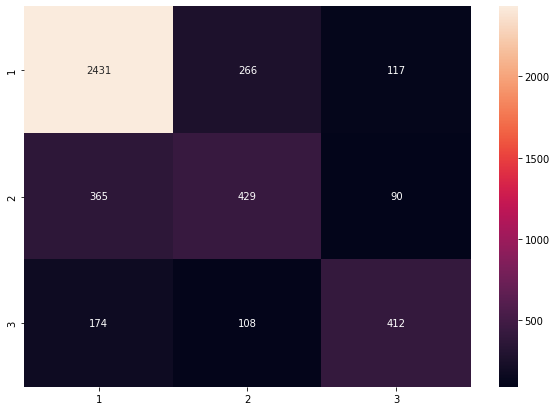

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

WORD PLOT


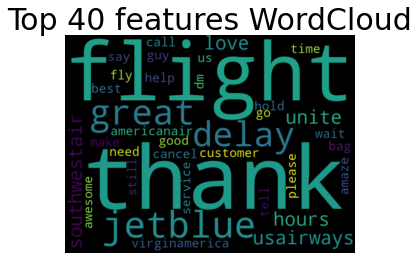

In [ ]:
all_features = Count_vec.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=forest.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 30)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

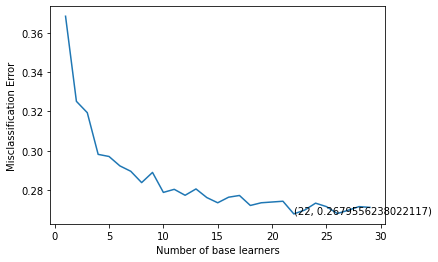

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7468123861566485

In [ ]:
optimal_learners

22

In [ ]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2424  270  120]
 [ 351  439   94]
 [ 160  117  417]]
0.7468123861566485


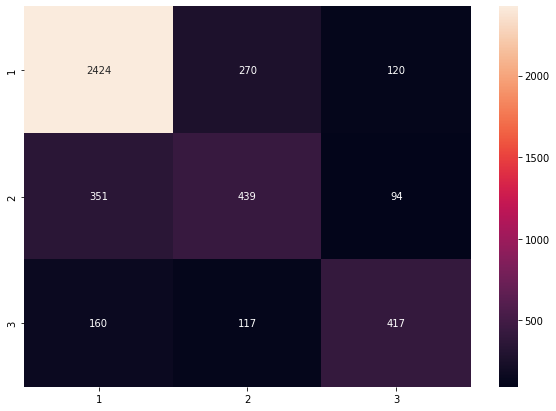

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

SUMMARY
- The model performance increased from 74.6% to 75% with hyperrtunning of the parameters

Term Frequency(TF) - Inverse Document Frequency(IDF)

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1,2))
data_features = vectorizer.fit_transform(df['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 500)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data.airline_sentiment)
df['labels'] = le.transform(df.airline_sentiment)


In [ ]:
df.head()

,airline_sentiment,text,labels
0,neutral,virginamerica dhepburn say,1
1,positive,virginamerica plus add commercials experience ...,2
2,neutral,virginamerica today must mean need take anothe...,1
3,negative,virginamerica really aggressive blast obnoxiou...,0
4,negative,virginamerica really big bad thing,0


In [ ]:
vectorizer.get_feature_names()

['aa',
 'able',
 'account',
 'actually',
 'add',
 'address',
 'agent',
 'agents',
 'ago',
 'air',
 'airline',
 'airlines',
 'airport',
 'airways',
 'allow',
 'almost',
 'already',
 'also',
 'always',
 'amaze',
 'american',
 'americanair',
 'americanair flight',
 'americanair thank',
 'americanair try',
 'another',
 'answer',
 'anyone',
 'anything',
 'app',
 'appreciate',
 'around',
 'arrive',
 'ask',
 'assistance',
 'attendant',
 'attendants',
 'available',
 'away',
 'awesome',
 'awful',
 'back',
 'bad',
 'bag',
 'baggage',
 'bc',
 'believe',
 'best',
 'better',
 'big',
 'board',
 'book',
 'book flight',
 'book problems',
 'bos',
 'boston',
 'break',
 'bring',
 'business',
 'buy',
 'call',
 'call back',
 'cancel',
 'cancel flight',
 'cancel flightled',
 'car',
 'card',
 'care',
 'chance',
 'change',
 'change flight',
 'charge',
 'charlotte',
 'check',
 'check bag',
 'checkin',
 'chicago',
 'claim',
 'class',
 'close',
 'clt',
 'come',
 'company',
 'confirm',
 'confirmation',
 'connect'

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=20, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=20, n_jobs=4)
0.6790983606557377


In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
result = forest.predict(X_test)

[[2562  160   92]
 [ 447  359   78]
 [ 211   92  391]]
0.7540983606557377


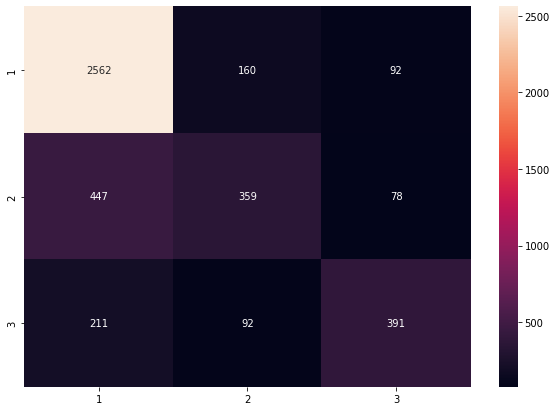

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  forest.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

WORD PLOT


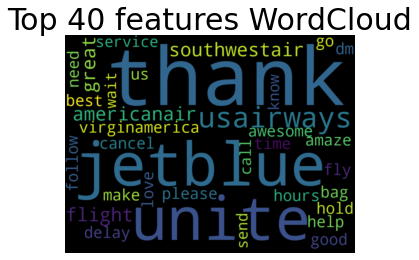

In [ ]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=forest.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

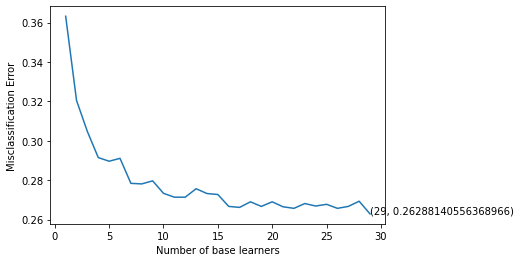

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7497723132969034

In [ ]:
optimal_learners

29

In [ ]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2555  165   94]
 [ 455  356   73]
 [ 207  105  382]]
0.7497723132969034


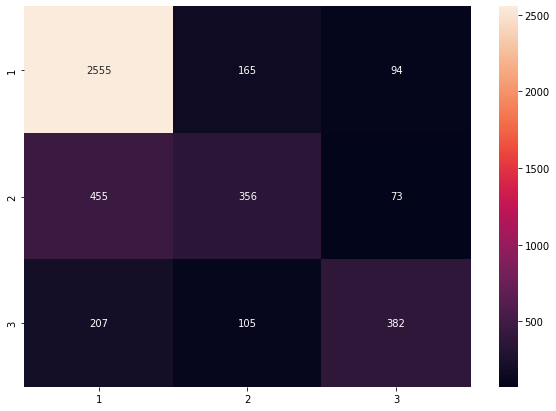

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

SUMMARY
- The model performance increased from 74.8% to 75.3% with hypertunning of the parameters

CONCLUSION

- Used a dataset which has reviews in text format and their sentiment grade  of positive, neutral and negative.
- Text Classification model building was the main objective
- Built EDA to determine airline customer sentiments
- Data preprocessing was conducted utilizing various techniques and libraries 
- Plotted Word Cloud to characterize customers sentiment into positive, neutral and negative
- Preprocessed the data using vectorizers which enables data to feed into model
- Trained the model and hypertuned the parameter to increase performance
- Predicted the results of the test data after building the classification model
- The model performed fairly well with the chosen classification model (random forest) - achieved 75% accuracy
- Other model can be applied to tune and hyperparameter tuning techniques, as well as other pre-processing techniques to increase the overall accuracy even further.